In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)
# y = 0.8x^2 + 0.9x + 2

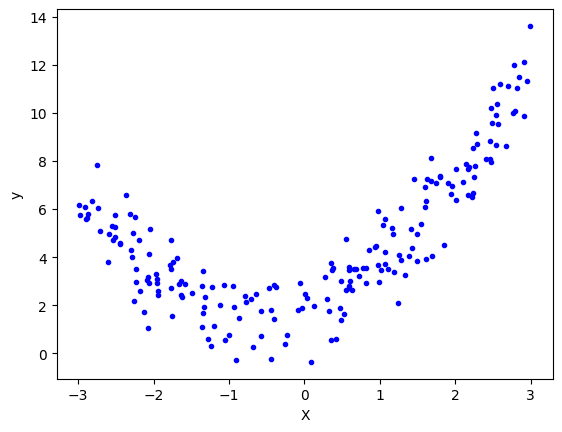

In [4]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [5]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
# Applying linear regression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.2751024664178301

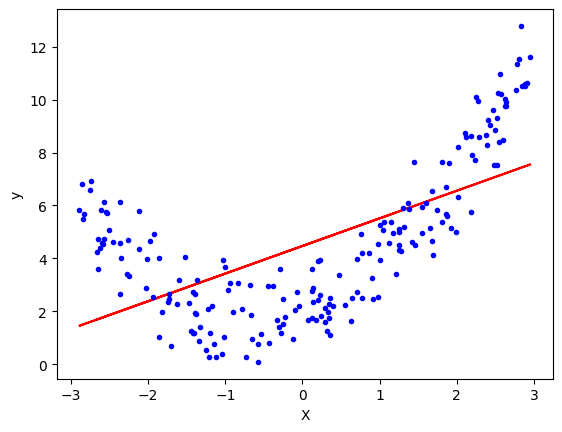

In [ ]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [7]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=2,include_bias=True,interaction_only=True) # only interactions, and in false which is default then all terms
                                                                            # interactions as well as power terms
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [ ]:
X_train_trans  ### [1,X,X**2]

array([[ 1.00000000e+00, -2.65498559e+00,  7.04894846e+00],
       [ 1.00000000e+00, -2.35523928e+00,  5.54715207e+00],
       [ 1.00000000e+00, -2.36576201e+00,  5.59682989e+00],
       [ 1.00000000e+00,  1.24946096e+00,  1.56115269e+00],
       [ 1.00000000e+00, -1.24628184e+00,  1.55321842e+00],
       [ 1.00000000e+00,  7.03213993e-01,  4.94509921e-01],
       [ 1.00000000e+00, -2.53822863e+00,  6.44260459e+00],
       [ 1.00000000e+00, -2.82725280e-01,  7.99335839e-02],
       [ 1.00000000e+00, -1.34387662e+00,  1.80600437e+00],
       [ 1.00000000e+00,  2.25373280e-01,  5.07931155e-02],
       [ 1.00000000e+00, -1.73744967e+00,  3.01873135e+00],
       [ 1.00000000e+00,  2.86372756e-01,  8.20093556e-02],
       [ 1.00000000e+00,  2.57406722e+00,  6.62582207e+00],
       [ 1.00000000e+00,  1.16905261e-01,  1.36668401e-02],
       [ 1.00000000e+00, -2.86226496e+00,  8.19256067e+00],
       [ 1.00000000e+00,  3.51680011e-01,  1.23678830e-01],
       [ 1.00000000e+00, -1.44259384e+00

In [ ]:
print(X_train[0])
print(X_train_trans[0])

[-2.65498559]
[ 1.         -2.65498559  7.04894846]


In [ ]:
# include_bias parameter

In [ ]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_trans)

ValueError: X has 3 features, but LinearRegression is expecting 2 features as input.

In [ ]:
r2_score(y_test,y_pred)

0.9070761543351297

In [ ]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.8538342  0.82222819]]
[1.92843904]


In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

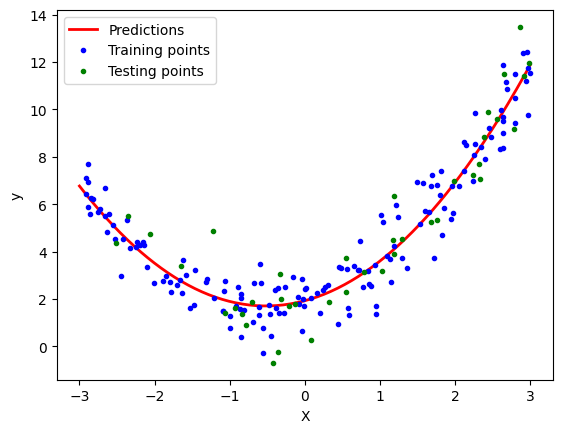

In [ ]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1066: RuntimeWarning: overflow encountered in square
  temp **= 2
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


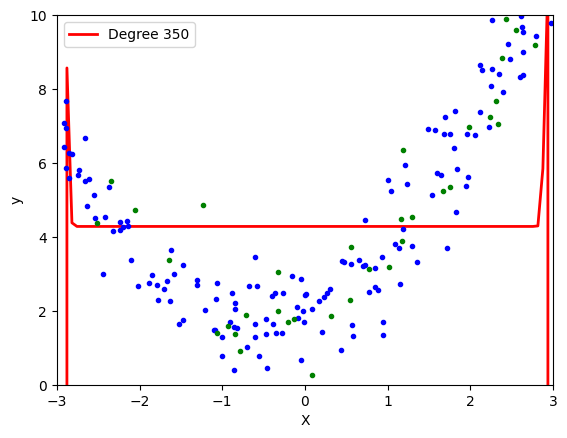

In [ ]:
polynomial_regression(350)

In [ ]:
poly.powers_

array([[0],
       [1],
       [2]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


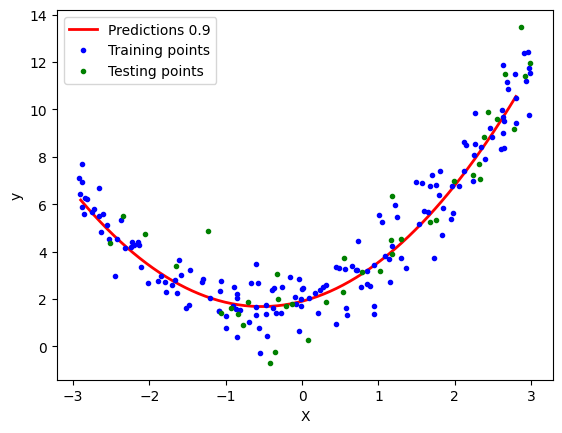

In [ ]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [ ]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)



In [ ]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [ ]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [ ]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [ ]:
print("Input",poly.n_input_features_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'

In [ ]:
X_multi_trans.shape

In [ ]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

In [ ]:
X_test_multi = poly.transform(final)

In [ ]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [ ]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()